In [1]:
import numpy as np
import pandas as pd
import random as rd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import img_to_array
from keras.utils import plot_model
import matplotlib.pyplot as plt
import pickle

In [2]:
path = 'C:\\Users\\Kenan\\Desktop\\SignLanguage\\input\\'

file_path_train = path + 'sign_mnist_train.csv'
file_path_test = path + 'sign_mnist_test.csv'


train = pd.read_csv(file_path_train)
test = pd.read_csv(file_path_test)

In [3]:
print(sum(train.isna().sum()))
print(sum(test.isna().sum()))

0
0


In [4]:
# Target value
Y_train = train["label"]
Y_test = test["label"]
# Input
X_train = train.drop(labels = ["label"],axis = 1)
X_test = test.drop(labels = ["label"],axis = 1)

In [5]:
print(Y_train.unique())

[ 3  6  2 13 16  8 22 18 10 20 17 19 21 23 24  1 12 11 15  4  0  5  7 14]


In [6]:
# Skaliranje podataka
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print(X_train.shape)
print(X_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [8]:
X_train, X_val, Y_train, Y_val=train_test_split(X_train,Y_train,train_size=0.7,test_size=0.3,random_state=5)

In [9]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(19218, 28, 28, 1)
(19218,)
(8237, 28, 28, 1)
(8237,)
(7172, 28, 28, 1)
(7172,)


In [10]:
from keras.utils import plot_model
#import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Kreiranje sekvencijalnog modela
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    layers.Dropout(.3),

    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(.3),

    layers.Flatten(),
    layers.Dropout(.35),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=25, activation="softmax"),
])

# Kompajliranje modela sa Adam optimizatorom
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.build(input_shape=(None, 28, 28, 1))

img_path = path + 'model_plot.png'
plot_model(model, to_file=img_path, show_shapes=True, show_layer_names=True)

# Prikazivanje slike modela koristeći Matplotlib

plt.show()




You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.build(input_shape=(None, 28, 28, 1))

In [13]:
# Treniranje modela
history = model.fit(
      x = X_train,
      y = Y_train,
      validation_data= (X_val,Y_val),
      batch_size = 64,
      epochs=50,
      verbose=2,
)

Epoch 1/50


301/301 - 11s - loss: 2.8403 - accuracy: 0.1754 - val_loss: 2.1944 - val_accuracy: 0.5359 - 11s/epoch - 36ms/step
Epoch 2/50
301/301 - 8s - loss: 1.0840 - accuracy: 0.6359 - val_loss: 0.4245 - val_accuracy: 0.9121 - 8s/epoch - 27ms/step
Epoch 3/50
301/301 - 8s - loss: 0.5064 - accuracy: 0.8252 - val_loss: 0.1524 - val_accuracy: 0.9715 - 8s/epoch - 27ms/step
Epoch 4/50
301/301 - 8s - loss: 0.3148 - accuracy: 0.8914 - val_loss: 0.0770 - val_accuracy: 0.9905 - 8s/epoch - 26ms/step
Epoch 5/50
301/301 - 8s - loss: 0.2129 - accuracy: 0.9275 - val_loss: 0.0438 - val_accuracy: 0.9967 - 8s/epoch - 27ms/step
Epoch 6/50
301/301 - 8s - loss: 0.1585 - accuracy: 0.9458 - val_loss: 0.0207 - val_accuracy: 0.9994 - 8s/epoch - 27ms/step
Epoch 7/50
301/301 - 8s - loss: 0.1222 - accuracy: 0.9587 - val_loss: 0.0161 - val_accuracy: 0.9990 - 8s/epoch - 27ms/step
Epoch 8/50
301/301 - 7s - loss: 0.1007 - accuracy: 0.9664 - val_loss: 0.0101 - val_accuracy: 0.9998 - 7s/epoch - 23ms/step
Epoch 9/50
3

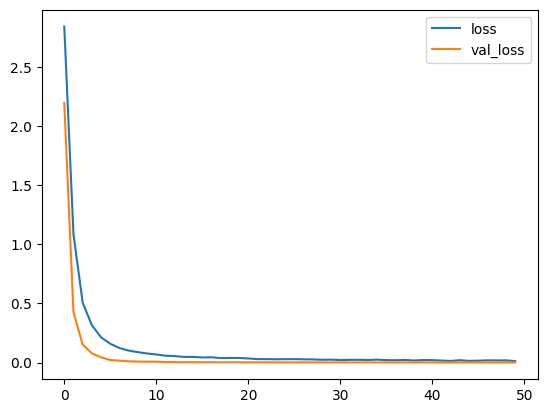

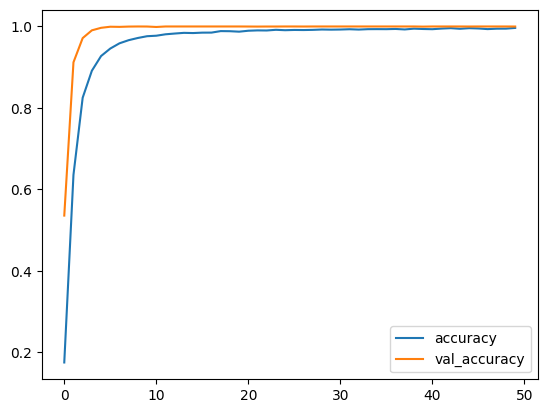

In [14]:
# Rezultati treniranja
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [15]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis = 1)

# Kreiranje izvještaja koji poredi predikciju sa stvarnim vrijednostima
print(classification_report(Y_test, predictions))


225/225 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       0.99      1.00      0.99       498
           5       1.00      1.00      1.00       247
           6       0.94      0.94      0.94       348
           7       1.00      0.95      0.98       436
           8       0.98      1.00      0.99       288
          10       1.00      1.00      1.00       331
          11       1.00      1.00      1.00       209
          12       1.00      0.98      0.99       394
          13       1.00      1.00      1.00       291
          14       1.00      1.00      1.00       246
          15       0.95      1.00      0.97       347
          16       0.99      1.00      0.99       164
          17       0.88   

In [16]:
from sklearn.metrics import accuracy_score

predicted_labels = predictions

accuracy = accuracy_score(Y_test, predicted_labels)

accuracy_percent = accuracy * 100
print(f"Accuracy: {accuracy_percent:.2f}%")

Accuracy: 98.61%


In [17]:
# Pod pretpostavkom da je 'model' varijabla u kojoj se nalazi trenirani model
model_filename = path + 'trenirani_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

In [18]:
# Učitaj model

# Putanja do pickle datoteke
# path = 'C:\\Users\\User1\\Desktop\\Sign Language\\'
model_filename = path + 'trenirani_model.pkl'

with open(model_filename, 'rb') as file:
    # Učitavanje datoteke
    model = pickle.load(file)

# Sada se u 'model' nalazi ono što je učitano iz pickle datoteke

In [19]:
alphabet=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [ ]:
import cv2
import numpy as np

# Otvaranje defaultne kamere
cap = cv2.VideoCapture(0)

# Provjera da li se kamera ispravno učitala
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Uzimanje dimenzija frame-a
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Proračun kordinata pravougaonika koji će se razmatrati
rect_width = 200
rect_height = 200
x = (frame_width - rect_width) // 2
y = (frame_height - rect_height) // 2


while True:
    # Učitaj frame kamere
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to read frame.")
        break

    # Iscrtavanje pravougaonika u frame-u
    cv2.rectangle(frame, (x, y), (x + rect_width, y + rect_height), (0, 255, 0), 2)

    # Učitavanje regiona od interesa
    roi = frame[y:y + rect_height, x:x + rect_width]

    # Obavljanje inferencije korištenjem implementiranog modela
    if model is not None:
        ##### U ovom dijelu koda uraditi preprocesiranje koje ste radili i za trening, validacijski i testni skup #####
        # U 'input_data' se nalaze ulazni podaci, tj. ulazna slika nakon preprocesiranja
        input_data = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        input_data = input_data / 255
        input_data = cv2.resize(input_data, (28, 28))

        # U 'result' se nalazi rezultat koji vrati model nakon inferencije
        # .reshape uradite na osnovu dimenzija koje prihvata model na ulazu
        result = np.argmax(model.predict(input_data.reshape(-1, 28, 28, 1)))

        # umjesto ispisivanja brojčane labele klase, možete je pretvoriti u naziv klase
        class_label = f"Class: {alphabet[result]}"
  
        # Prikaz rezultujuće klase iznad pravougaonika
        cv2.putText(frame, class_label, (x + rect_width, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2,
                    cv2.LINE_AA)

    # Prikaz frame-a
    cv2.imshow('Camera Feed', frame)

    # Prekid petlje ako se pritisne na 'q' na tastaturi
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Oslobađanje kamere i zatvaranje prozora
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 18ms/step
